<a href="https://colab.research.google.com/github/theresaskruzna/classification_project/blob/main/classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification model project - Alcohol effects on study**

# Introduction

The analysis aims to predict student performance in relationship to their level of alcohol consumption.

# Hypothesis

H1: Significant correlation between student's support system and higher alcohol consumption tendencies.


H2: Higher alcohol consumption has negative impact on overall grade more than minimal alcohol consumption.


# Import libraries

In [ ]:
pip install ydata-profiling[notebook]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.4 MB/s eta 0:00:00
   ━━━━

In [ ]:
pip install lazypredict

In [ ]:
# data pre-processing
import numpy as np # linear algebra
import pandas as pd # data processing
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# models
from lazypredict.Supervised import LazyClassifier

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Command to list all installed package versions
!pip list

Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arrow                              1.3.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.6.0.33.42
astunparse                         1.6.3
async-lru                          2.0.4
atpublic                           4.1.0
attrs                 

# Data pre-processing

## Load original data

https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study

In [ ]:
maths = pd.read_csv("Maths.csv")
maths.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

## Feature description

Attributes for both Maths.csv (Math course) and Portuguese.csv (Portuguese language course) datasets:


---




school:	student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex:	student's sex (binary: 'F' - female or 'M' - male)

age:	student's age (numeric: from 15 to 22)

address:	student's home address type (binary: 'U' - urban or 'R' - rural)

famsize	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu	mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu	father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob	mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob	father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian	student's guardian (nominal: 'mother', 'father' or 'other')

traveltime	home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime	weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures	number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup	extra educational support (binary: yes or no)

famsup	family educational support (binary: yes or no)

paid	extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities	extra-curricular activities (binary: yes or no)

nursery	attended nursery school (binary: yes or no)

higher	wants to take higher education (binary: yes or no)

internet	Internet access at home (binary: yes or no)

romantic	with a romantic relationship (binary: yes or no)

famrel	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime	free time after school (numeric: from 1 - very low to 5 - very high)

goout	going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc	weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health	current health status (numeric: from 1 - very bad to 5 - very good)

absences	number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:



---



G1:	first period grade (numeric: from 0 to 20)

G2:	second period grade (numeric: from 0 to 20)

G3:	final grade (numeric: from 0 to 20, output target)

## Data exploration

In [ ]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
maths.shape

(395, 33)

In [ ]:
maths.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
maths.describe(include='int64').T

count  mean  std   min   25%   50%   75%   max
age        395.00 16.70 1.28 15.00 16.00 17.00 18.00 22.00
Medu       395.00  2.75 1.09  0.00  2.00  3.00  4.00  4.00
Fedu       395.00  2.52 1.09  0.00  2.00  2.00  3.00  4.00
traveltime 395.00  1.45 0.70  1.00  1.00  1.00  2.00  4.00
studytime  395.00  2.04 0.84  1.00  1.00  2.00  2.00  4.00
failures   395.00  0.33 0.74  0.00  0.00  0.00  0.00  3.00
famrel     395.00  3.94 0.90  1.00  4.00  4.00  5.00  5.00
freetime   395.00  3.24 1.00  1.00  3.00  3.00  4.00  5.00
goout      395.00  3.11 1.11  1.00  2.00  3.00  4.00  5.00
Dalc       395.00  1.48 0.89  1.00  1.00  1.00  2.00  5.00
Walc       395.00  2.29 1.29  1.00  1.00  2.00  3.00  5.00
health     395.00  3.55 1.39  1.00  3.00  4.00  5.00  5.00
absences   395.00  5.71 8.00  0.00  0.00  4.00  8.00 75.00
G1         395.00 10.91 3.32  3.00  8.00 11.00 13.00 19.00
G2         395.00 10.71 3.76  0.00  9.00 11.00 13.00 19.00
G3         395.00 10.42 4.58  0.00  8.00 11.00 14.00 20.00

In [ ]:
maths.describe(include='object').T

count unique     top freq
school       395      2      GP  349
sex          395      2       F  208
address      395      2       U  307
famsize      395      2     GT3  281
Pstatus      395      2       T  354
Mjob         395      5   other  141
Fjob         395      5   other  217
reason       395      4  course  145
guardian     395      3  mother  273
schoolsup    395      2      no  344
famsup       395      2     yes  242
paid         395      2      no  214
activities   395      2     yes  201
nursery      395      2     yes  314
higher       395      2     yes  375
internet     395      2     yes  329
romantic     395      2      no  263

In [ ]:
maths[['school',
    'sex',
    'age',
    'address',
    'famsize',
    'Pstatus',
    'Medu',
    'Fedu',
    'Mjob',
    'Fjob',
    'reason',
    'guardian']].describe().T

count  mean  std   min   25%   50%   75%   max
age  395.00 16.70 1.28 15.00 16.00 17.00 18.00 22.00
Medu 395.00  2.75 1.09  0.00  2.00  3.00  4.00  4.00
Fedu 395.00  2.52 1.09  0.00  2.00  2.00  3.00  4.00

In [ ]:
unique_values = maths.nunique()
unique_values

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [ ]:
missing_values = maths.isna().sum().to_frame('missing_values')
missing_values

missing_values
school                   0
sex                      0
age                      0
address                  0
famsize                  0
Pstatus                  0
Medu                     0
Fedu                     0
Mjob                     0
Fjob                     0
reason                   0
guardian                 0
traveltime               0
studytime                0
failures                 0
schoolsup                0
famsup                   0
paid                     0
activities               0
nursery                  0
higher                   0
internet                 0
romantic                 0
famrel                   0
freetime                 0
goout                    0
Dalc                     0
Walc                     0
health                   0
absences                 0
G1                       0
G2                       0
G3                       0

In [ ]:
duplicates = maths.duplicated().sum()
print(f'Duplicated values: {duplicates}')

Duplicated values: 0


In [ ]:
print(maths.freetime.value_counts())

freetime
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64


## Feature engineering

### Encoding categorical features

In [ ]:
# Get a list of categorical columns
categorical_cols = maths.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


### Label encoding and one-hot encoding

In [ ]:
categorical_cols = maths.select_dtypes(include=['object']).columns
exclude_cols = ['Mjob', 'Fjob', 'reason', 'guardian']  # Columns for one-hot encoding
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]  # Columns for label encoding

maths_encoded = maths.copy()  # Create a copy of the DataFrame
label_encoder = LabelEncoder()  # Create a LabelEncoder object

# Apply label encoding
for col in categorical_cols:
    maths_encoded[col] = label_encoder.fit_transform(maths[col])

# Apply one-hot encoding with dtype=int to get binary values and drop original columns
for col in exclude_cols:
    one_hot_encoded = pd.get_dummies(maths[col], prefix=col, dtype=int)
    maths_encoded = pd.concat([maths_encoded, one_hot_encoded], axis=1)
    maths_encoded.drop(columns=[col], inplace=True)  # Drop the original column

maths_encoded.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        1        0        0     4     4           2   
1       0    0   17        1        0        1     1     1           1   
2       0    0   15        1        1        1     1     1           1   
3       0    0   15        1        0        1     4     2           1   
4       0    0   16        1        0        1     3     3           1   

   studytime  ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  \
0          2  ...           0              0             1              1   
1          2  ...           1              0             0              1   
2          2  ...           1              0             0              0   
3          3  ...           0              1             0              0   
4          2  ...           1              0             0              0   

   reason_home  reason_other  reason_reputation  guardian_father  \
0            0             0                  0                0   
1            0             0                  0                1   
2            0             1                  0                0   
3            1             0                  0                0   
4            1             0                  0                1   

   guardian_mother  guardian_other  
0                1               0  
1                0               0  
2                1               0  
3                1               0  
4                0               0  

[5 rows x 46 columns]

In [ ]:
maths_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             395 non-null    int64
 1   sex                395 non-null    int64
 2   age                395 non-null    int64
 3   address            395 non-null    int64
 4   famsize            395 non-null    int64
 5   Pstatus            395 non-null    int64
 6   Medu               395 non-null    int64
 7   Fedu               395 non-null    int64
 8   traveltime         395 non-null    int64
 9   studytime          395 non-null    int64
 10  failures           395 non-null    int64
 11  schoolsup          395 non-null    int64
 12  famsup             395 non-null    int64
 13  paid               395 non-null    int64
 14  activities         395 non-null    int64
 15  nursery            395 non-null    int64
 16  higher             395 non-null    int64
 17  internet        

### Handling missing / duplicate values

Original data set does not contain any missing or duplicate values.

### Handling outliers

In [ ]:
result = maths_encoded.groupby('age').agg(['min', 'max'])
print(result)

    school     sex     address     famsize     Pstatus      ... reason_other  \
       min max min max     min max     min max     min max  ...          min   
age                                                         ...                
15       0   0   0   1       0   1       0   1       0   1  ...            0   
16       0   0   0   1       0   1       0   1       0   1  ...            0   
17       0   1   0   1       0   1       0   1       0   1  ...            0   
18       0   1   0   1       0   1       0   1       0   1  ...            0   
19       0   1   0   1       0   1       0   1       0   1  ...            0   
20       0   1   0   1       1   1       0   1       0   1  ...            0   
21       1   1   1   1       0   0       0   0       1   1  ...            0   
22       0   0   1   1       1   1       0   0       1   1  ...            1   

        reason_reputation     guardian_father     guardian_mother      \
    max               min max             min 

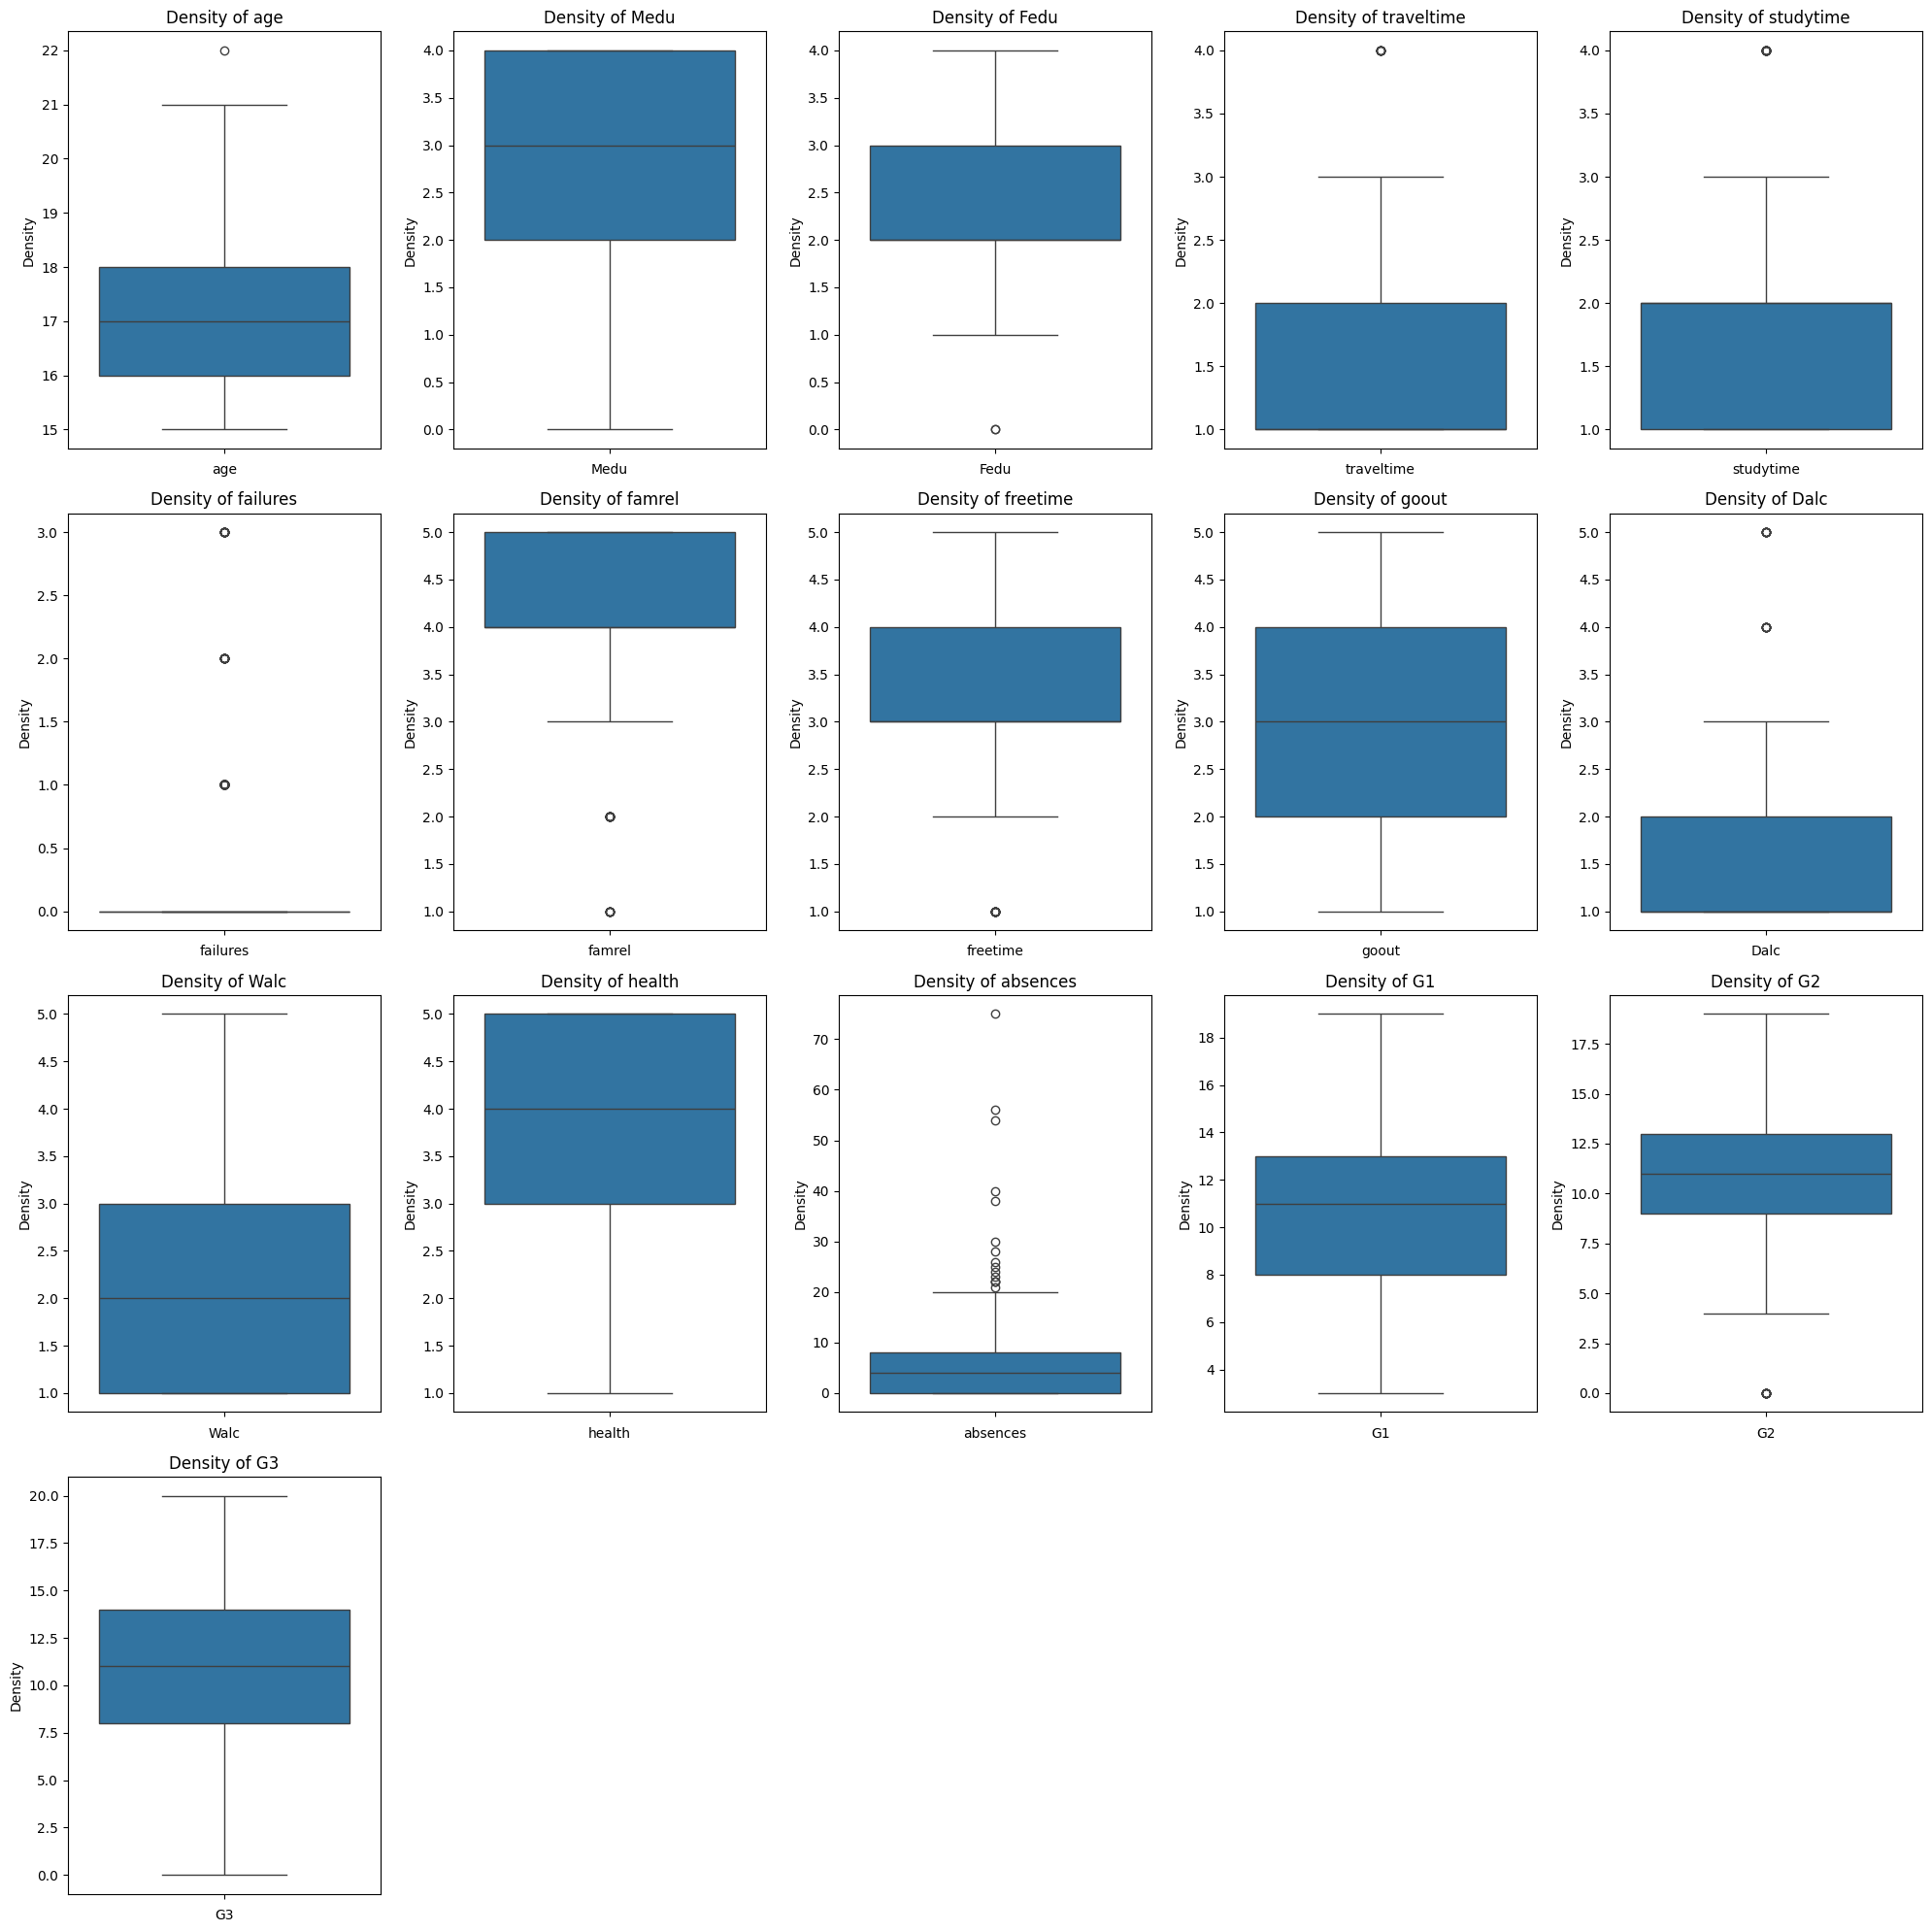

In [ ]:
# Select numerical columns
numerical_cols = maths.select_dtypes(include=np.number).columns

# Calculate the number of rows and columns for the subplots
num_cols = 5  # Number of columns per row
num_rows = int(np.ceil(len(numerical_cols) / num_cols))  # Calculate the number of rows needed

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot KDEs in a loop
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=maths[col], fill=True, ax=axes[i])
    axes[i].set_title(f'Density of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Hide any extra empty subplots
for i in range(len(numerical_cols), num_rows * num_cols):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate z-scores for each column
z_scores = np.abs((maths_encoded - maths_encoded.mean()) / maths_encoded.std())

# Set threshold for z-scores (e.g., 4 standard deviations from the mean)
threshold = 4

# Remove outliers
maths_clean = maths_encoded[(z_scores < threshold).all(axis=1)]
maths_clean.reset_index(drop=True, inplace=True)

# Verify the number of rows before and after
print("Original dataset rows:", maths_encoded.shape[0])
print("Dataset rows after removing outliers:", maths_clean.shape[0])

# Save the cleaned dataset
maths_clean.to_csv("cleaned_dataset_no_outliers.csv", index=False)

# Print the updated DataFrame (uncomment)
# print(maths_clean)

Original dataset rows: 395
Dataset rows after removing outliers: 334


### Data separation - features / target variable

In [ ]:
# Target variable is G3 (final grade)
y = maths_encoded["G3"]

# The rest are features
X = maths_encoded.drop(columns=["G3"])

### Feature scaling

In [ ]:
# zajistíme stejné měřítko provšechny sloupce od 0 - 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# convert to a dataframe, for better readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0    0.00 0.00 0.43     1.00     0.00     0.00  1.00  1.00        0.33   
1    0.00 0.00 0.29     1.00     0.00     1.00  0.25  0.25        0.00   
2    0.00 0.00 0.00     1.00     1.00     1.00  0.25  0.25        0.00   
3    0.00 0.00 0.00     1.00     0.00     1.00  1.00  0.50        0.00   
4    0.00 0.00 0.14     1.00     0.00     1.00  0.75  0.75        0.00   

   studytime  ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  \
0       0.33  ...        0.00           0.00          1.00           1.00   
1       0.33  ...        1.00           0.00          0.00           1.00   
2       0.33  ...        1.00           0.00          0.00           0.00   
3       0.67  ...        0.00           1.00          0.00           0.00   
4       0.33  ...        1.00           0.00          0.00           0.00   

   reason_home  reason_other  reason_reputation  guardian_father  \
0         0.00          0.00               0.00             0.00   
1         0.00          0.00               0.00             1.00   
2         0.00          1.00               0.00             0.00   
3         1.00          0.00               0.00             0.00   
4         1.00          0.00               0.00             1.00   

   guardian_mother  guardian_other  
0             1.00            0.00  
1             0.00            0.00  
2             1.00            0.00  
3             1.00            0.00  
4             0.00            0.00  

[5 rows x 45 columns]

In [ ]:
# Select the numerical columns for standardization
num_col = maths_encoded.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
maths_encoded_standardized = maths_encoded.copy()  # Create a copy to avoid modifying the original
maths_encoded_standardized[num_col] = scaler.fit_transform(maths_encoded[num_col])

# Display the first few rows of the standardized data
maths_encoded_standardized.head()

school   sex   age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0   -0.36 -0.95  1.02     0.54    -0.64    -2.94  1.14  1.36        0.79   
1   -0.36 -0.95  0.24     0.54    -0.64     0.34 -1.60 -1.40       -0.64   
2   -0.36 -0.95 -1.33     0.54     1.57     0.34 -1.60 -1.40       -0.64   
3   -0.36 -0.95 -1.33     0.54    -0.64     0.34  1.14 -0.48       -0.64   
4   -0.36 -0.95 -0.55     0.54    -0.64     0.34  0.23  0.44       -0.64   

   studytime  ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  \
0      -0.04  ...       -1.10          -0.63          3.55           1.31   
1      -0.04  ...        0.91          -0.63         -0.28           1.31   
2      -0.04  ...        0.91          -0.63         -0.28          -0.76   
3       1.15  ...       -1.10           1.60         -0.28          -0.76   
4      -0.04  ...        0.91          -0.63         -0.28          -0.76   

   reason_home  reason_other  reason_reputation  guardian_father  \
0        -0.62         -0.32              -0.60            -0.54   
1        -0.62         -0.32              -0.60             1.84   
2        -0.62          3.16              -0.60            -0.54   
3         1.62         -0.32              -0.60            -0.54   
4         1.62         -0.32              -0.60             1.84   

   guardian_mother  guardian_other  
0             0.67           -0.30  
1            -1.50           -0.30  
2             0.67           -0.30  
3             0.67           -0.30  
4            -1.50           -0.30  

[5 rows x 46 columns]

### ? Feature selection

In [ ]:
# Převod indexu na sloupec
prumerne_hodnoty.reset_index(inplace=True)

# Nyní bude "Country" běžným sloupcem a bude k dispozici v seznamu sloupců
final_col = ['Country', 'Life expectancy ', 'GDP', 'Income composition of resources',
                    'percentage expenditure', 'infant deaths', 'Adult Mortality']

# Výběr požadovaných sloupců
df_vyber_sloupcu = prumerne_hodnoty[potrebne_sloupce]

# Zobrazení výsledku
print(df_vyber_sloupcu.head())

# Uložení do nového souboru
df_vyber_sloupcu.to_csv('dataset_vyber_sloupcu.csv', index=False)

### Dropping column

## Exploratory data analysis (EDA)

### Univariate graphical

Histogram

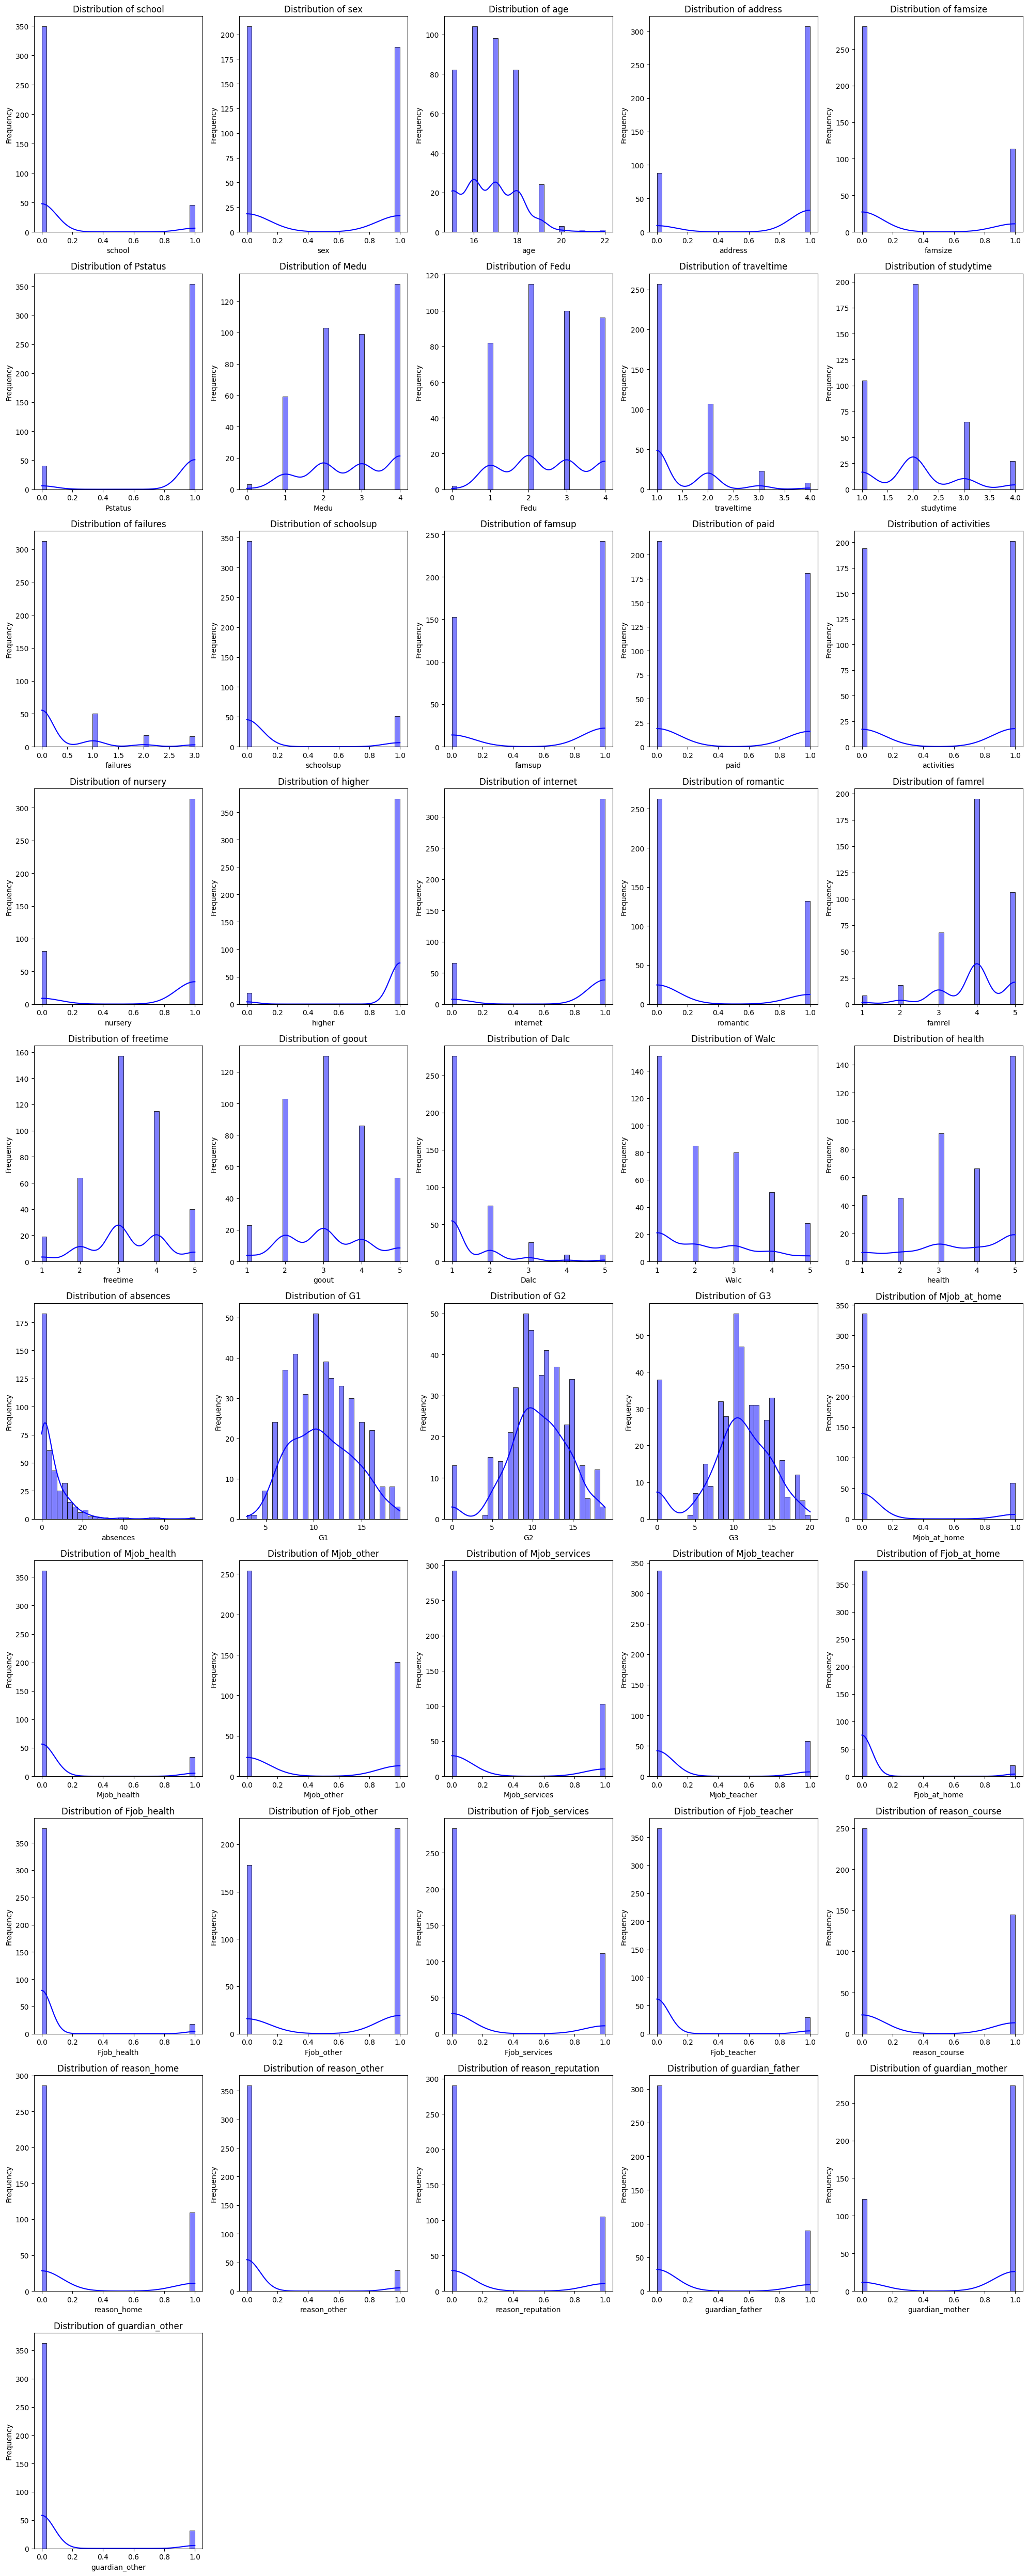

In [ ]:
# Select numerical columns
numerical_cols = maths_encoded.select_dtypes(include=np.number).columns

# Calculate the number of rows and columns for the subplots
num_cols = 5  # Number of columns per row
num_rows = int(np.ceil(len(numerical_cols) / num_cols))  # Calculate the number of rows needed

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot KDEs in a loop
for i, col in enumerate(numerical_cols):
    sns.histplot(data=maths_encoded[col], bins=30, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any extra empty subplots
for i in range(len(numerical_cols), num_rows * num_cols):
    axes[i].set_visible(False)

# Adjust subplot parameters to reduce whitespace
plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Adjust wspace and hspace as needed

plt.tight_layout()
plt.show()

Box plot

<Axes: xlabel='absences', ylabel='G3'>

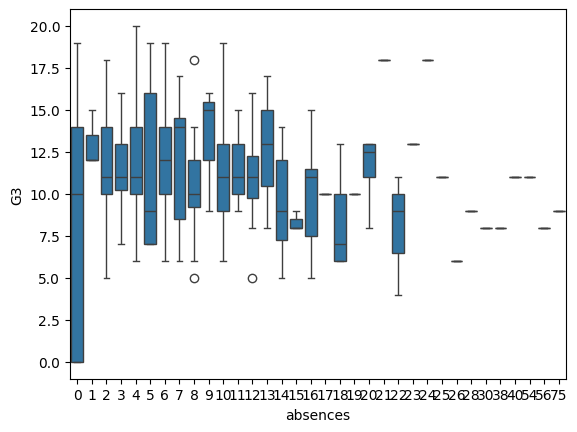

In [ ]:
sns.boxplot(data=maths, x='absences', y='G3')

KDE plot

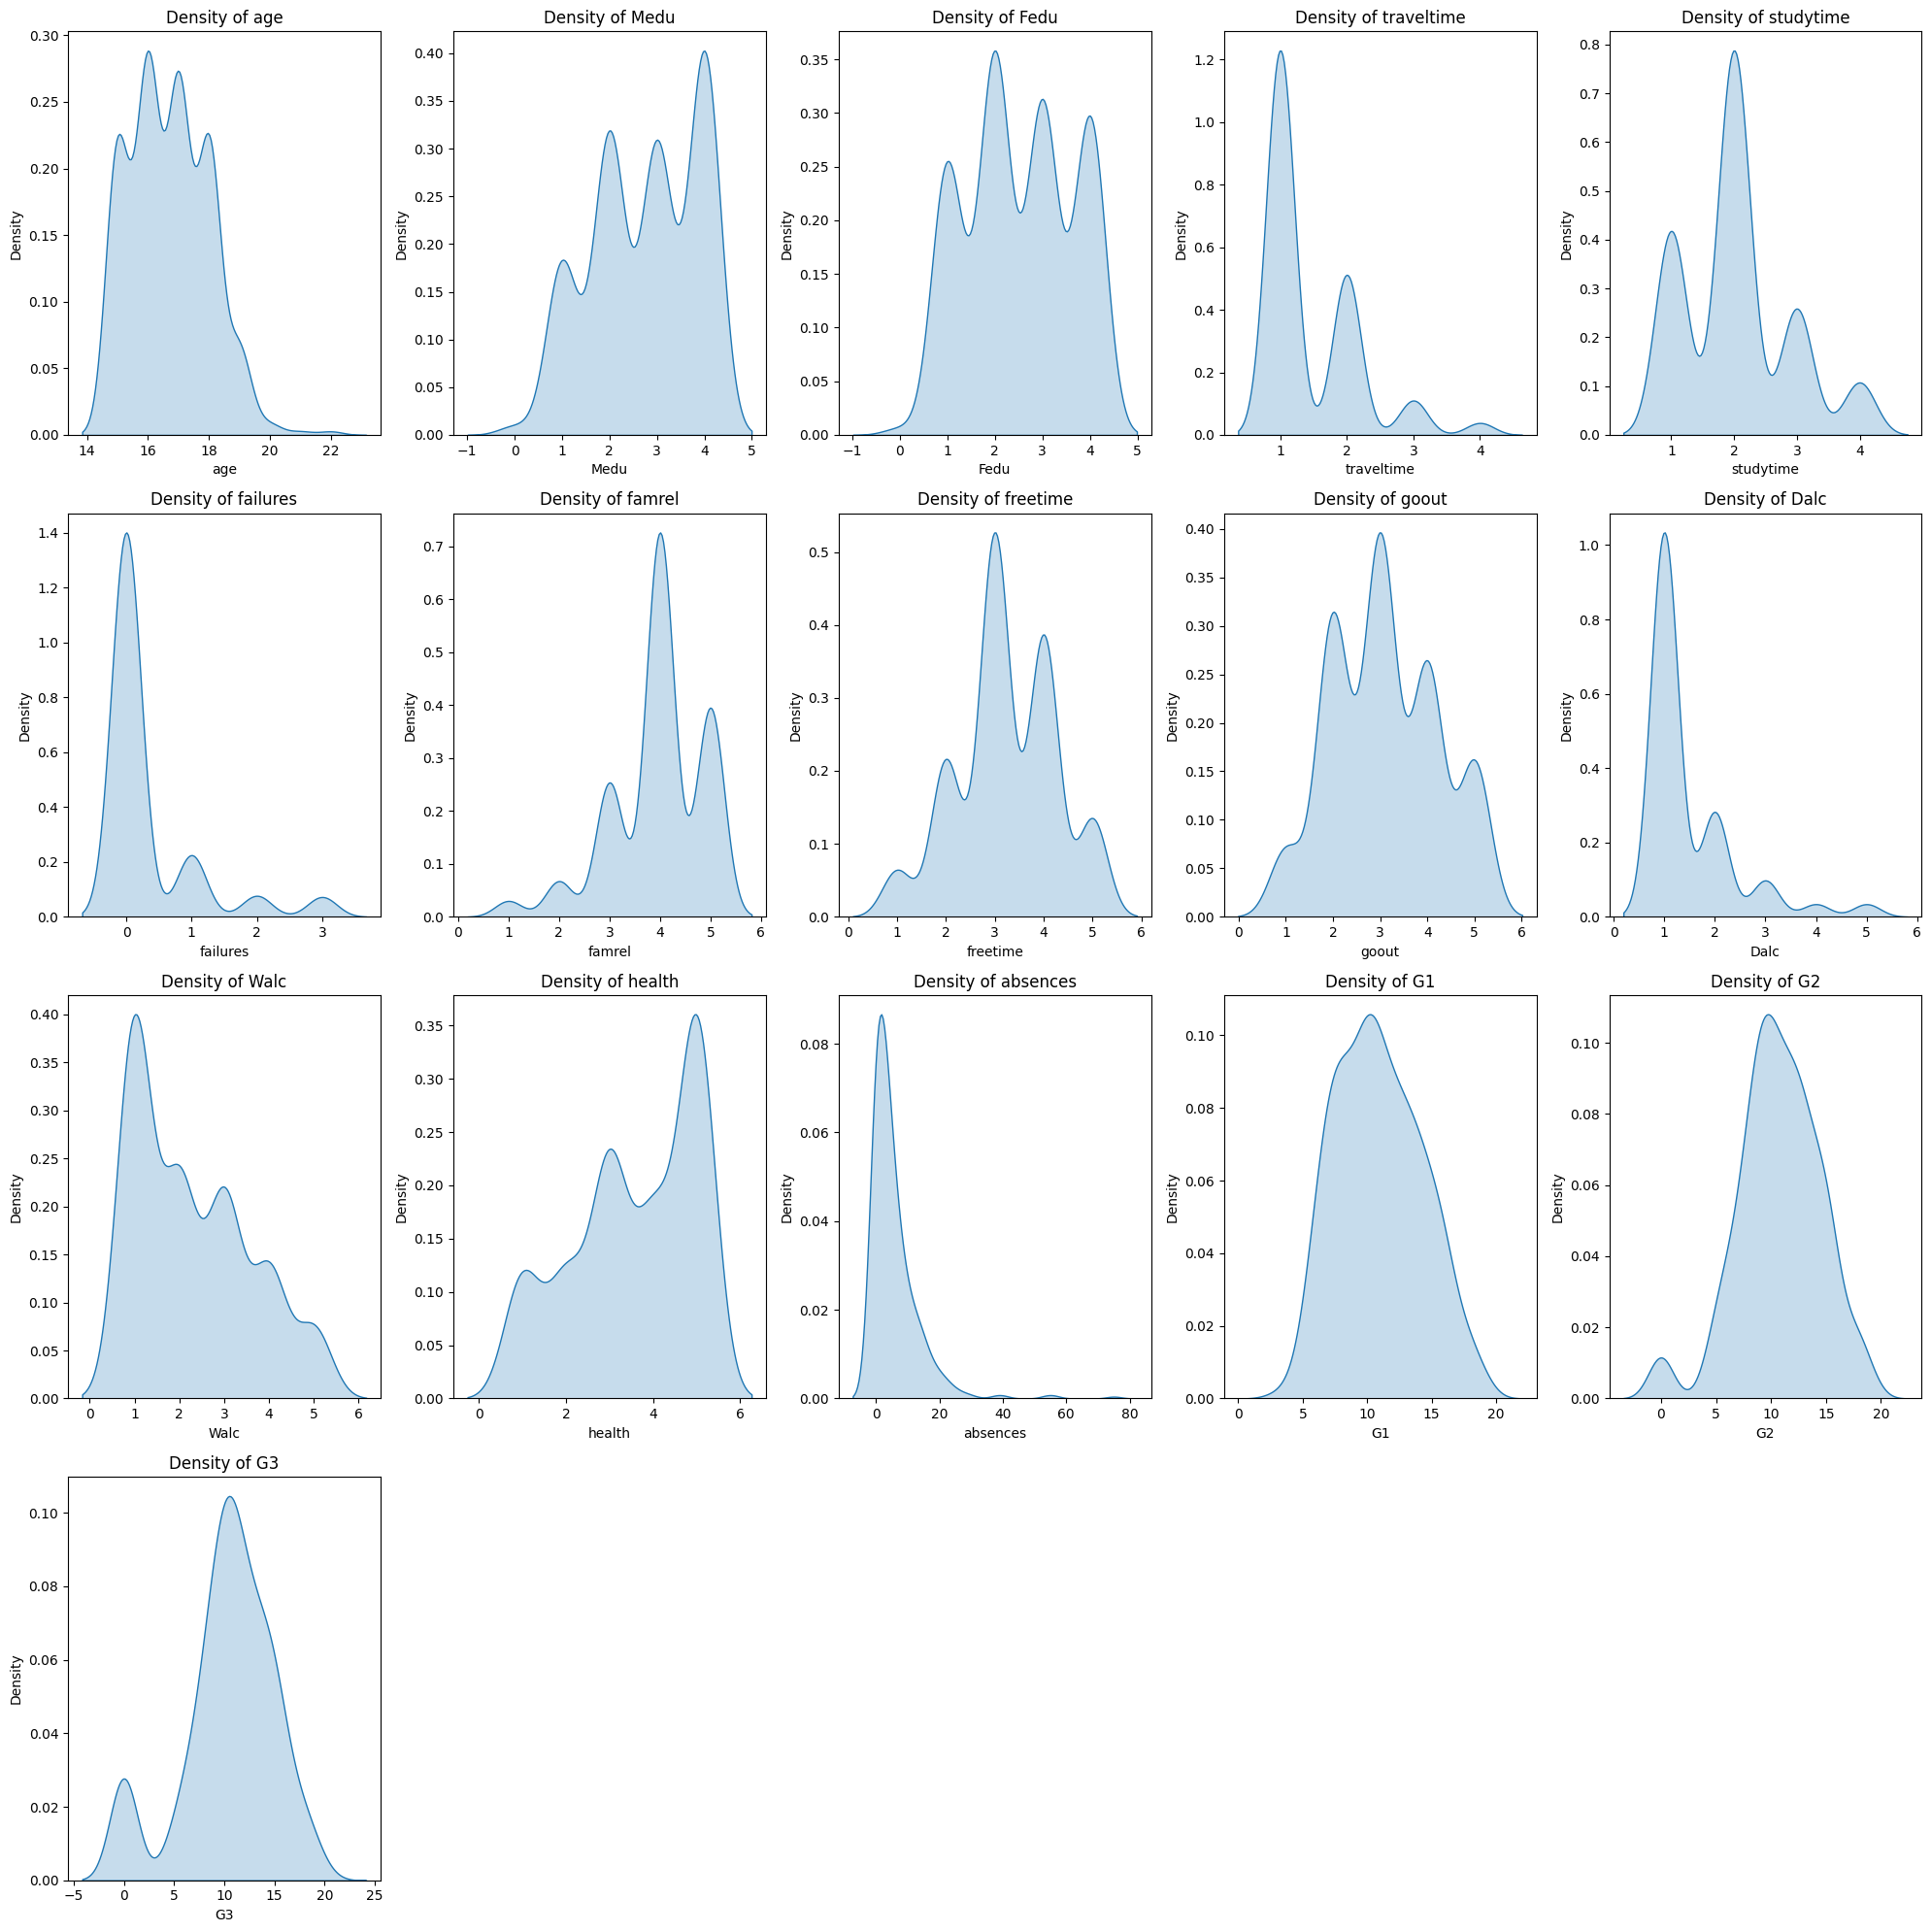

In [ ]:
# Select numerical columns
numerical_cols = maths.select_dtypes(include=np.number).columns

# Calculate the number of rows and columns for the subplots
num_cols = 5  # Number of columns per row
num_rows = int(np.ceil(len(numerical_cols) / num_cols))  # Calculate the number of rows needed

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot KDEs in a loop
for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=maths[col], fill=True, ax=axes[i])
    axes[i].set_title(f'Density of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Hide any extra empty subplots
for i in range(len(numerical_cols), num_rows * num_cols):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### Multivariate graphical /correlation

Heat map

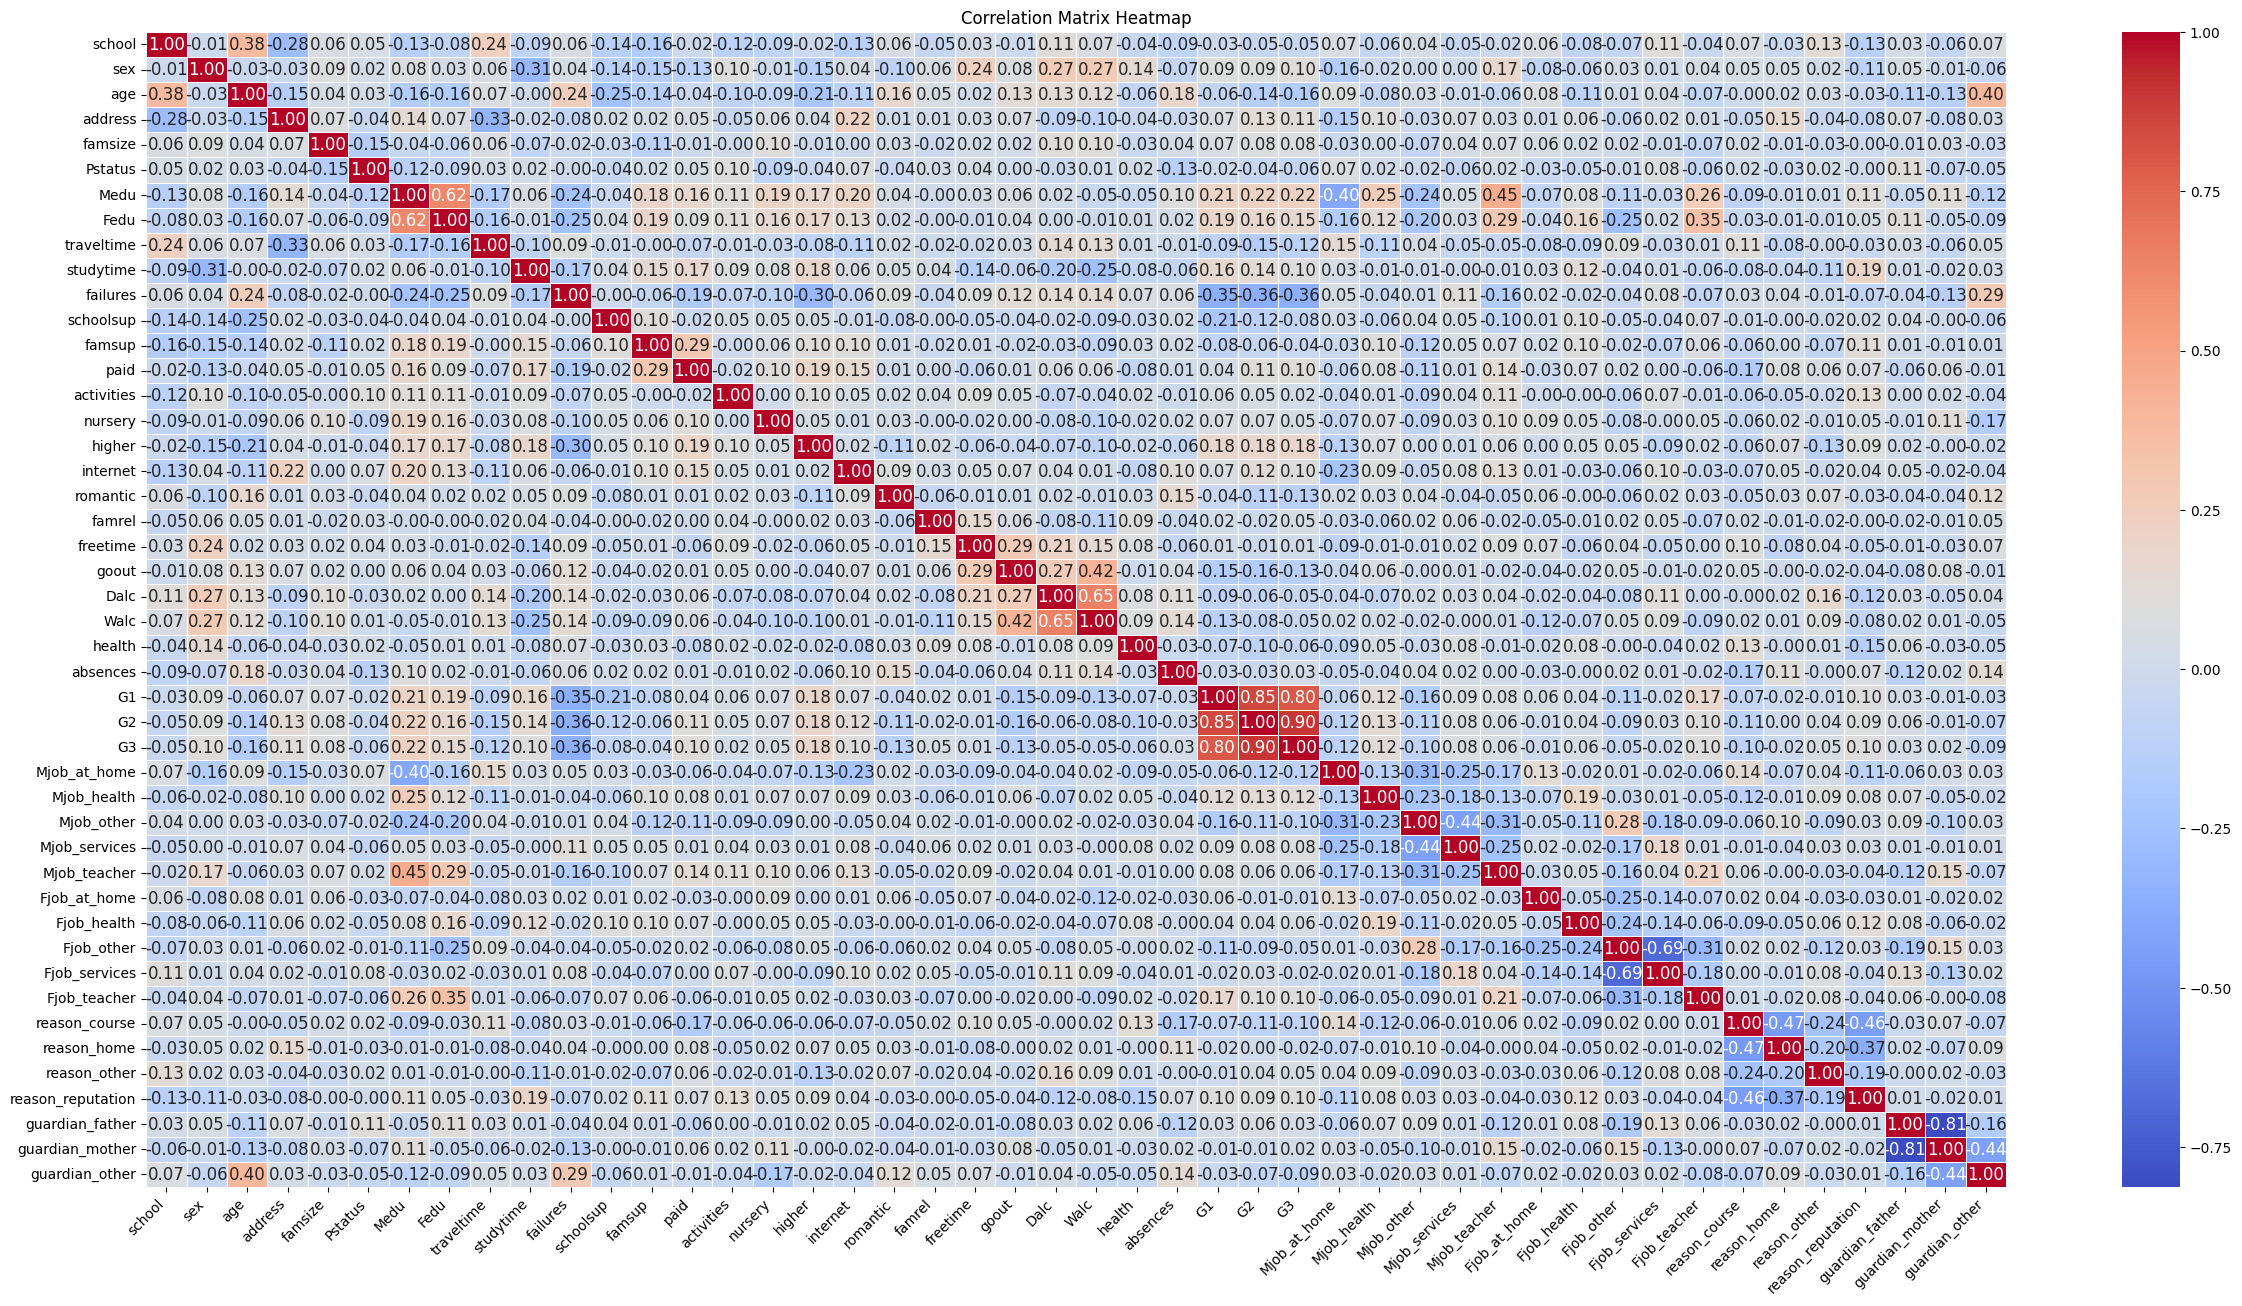

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(maths_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 12})
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

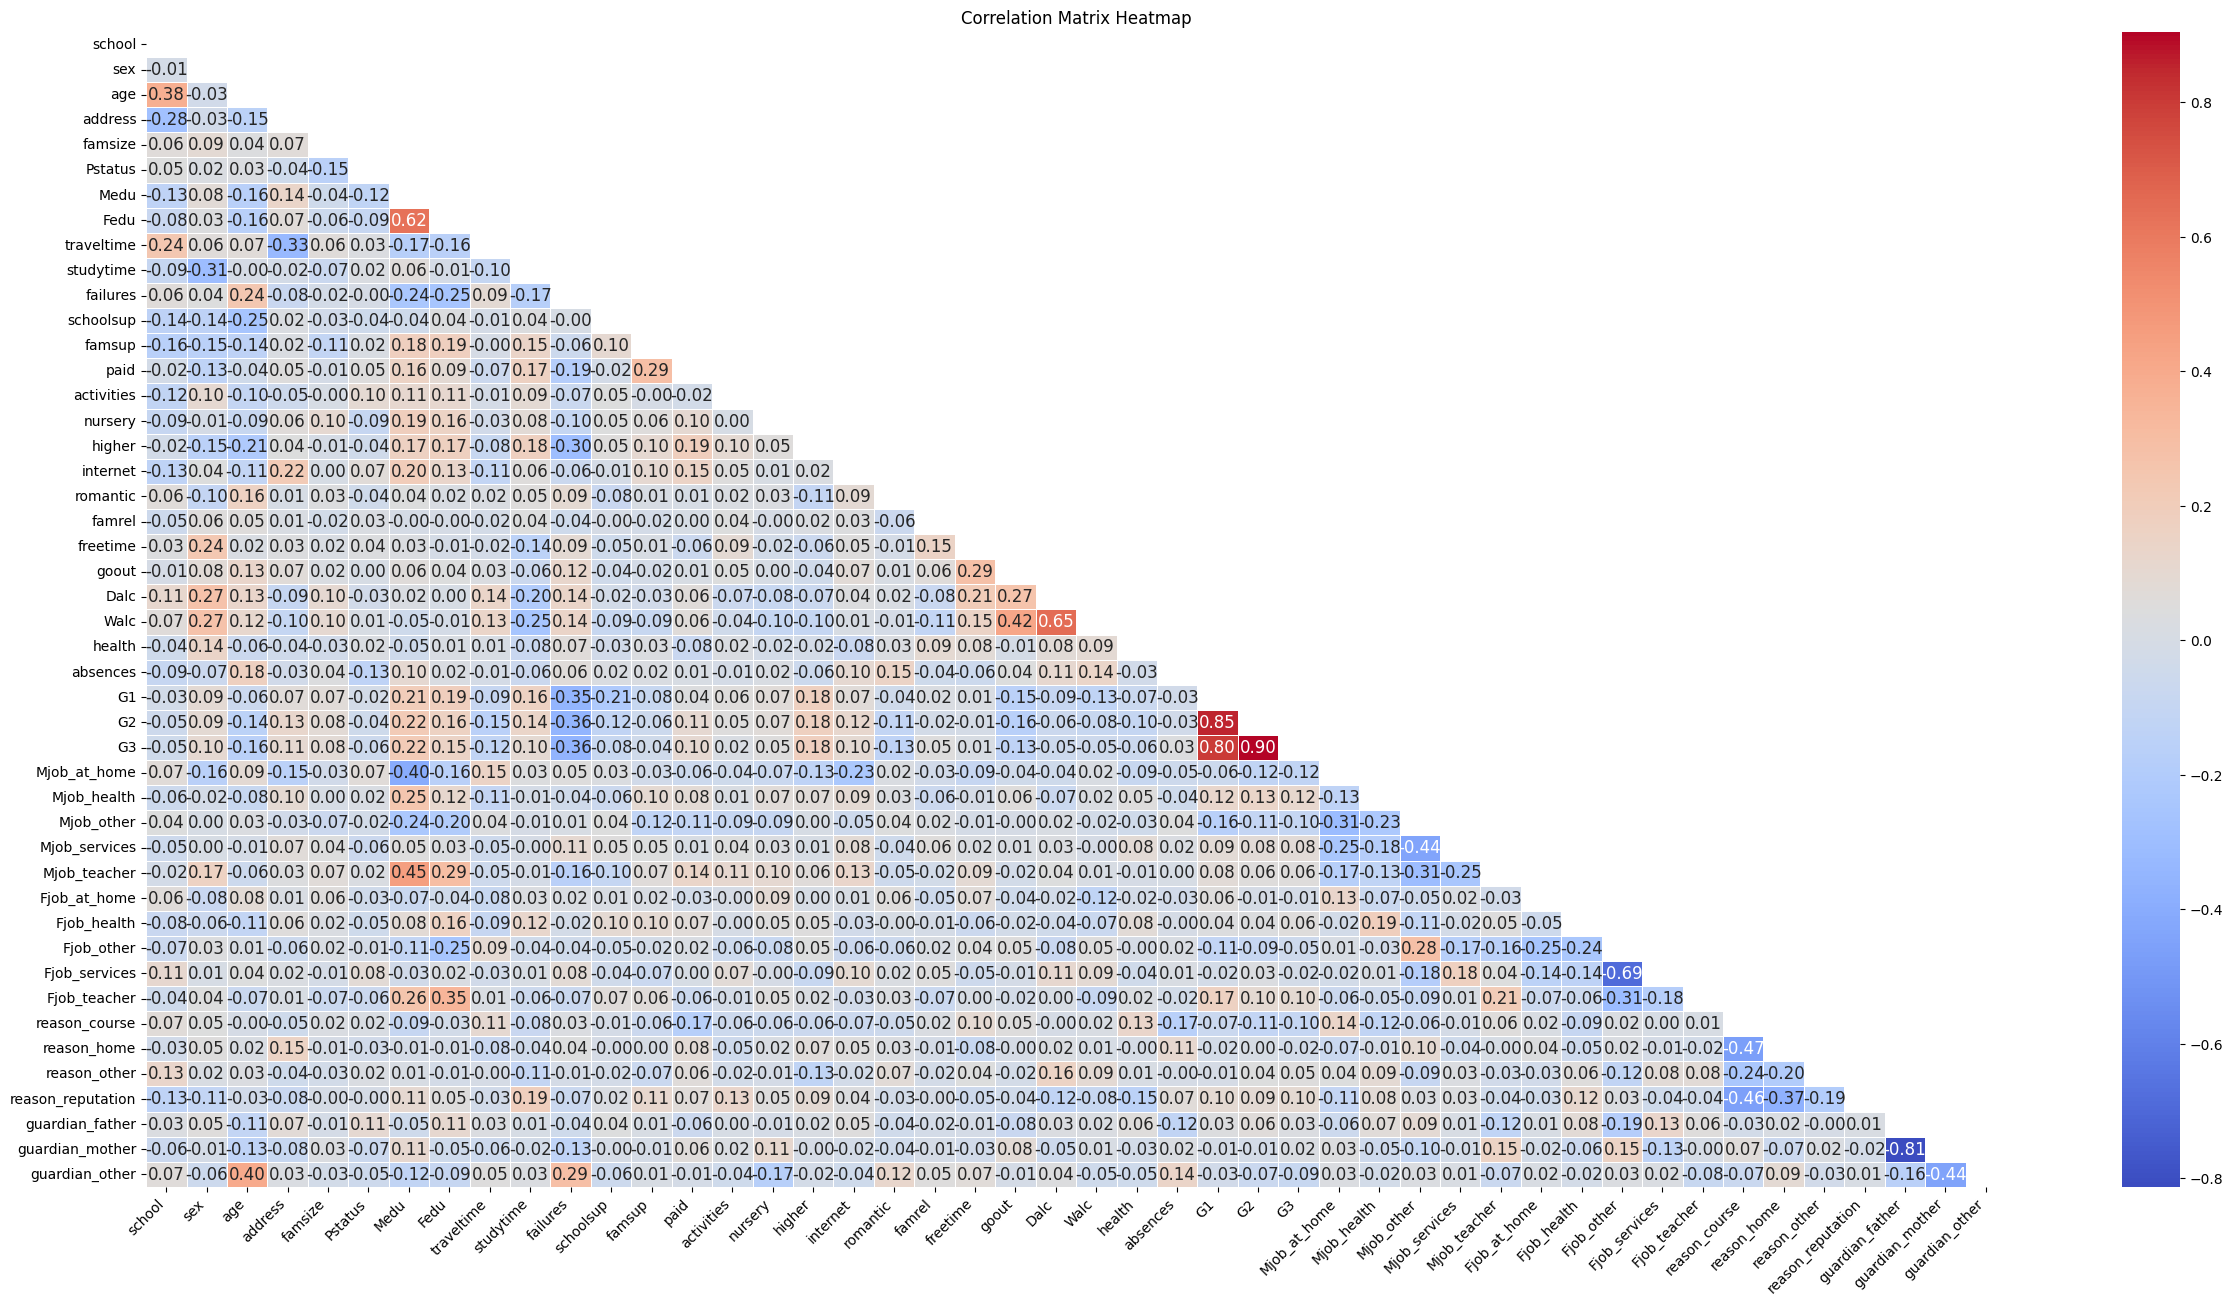

In [ ]:
plt.figure(figsize=(30, 15))
corr_matrix = maths_encoded.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 12})
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

Pair plot

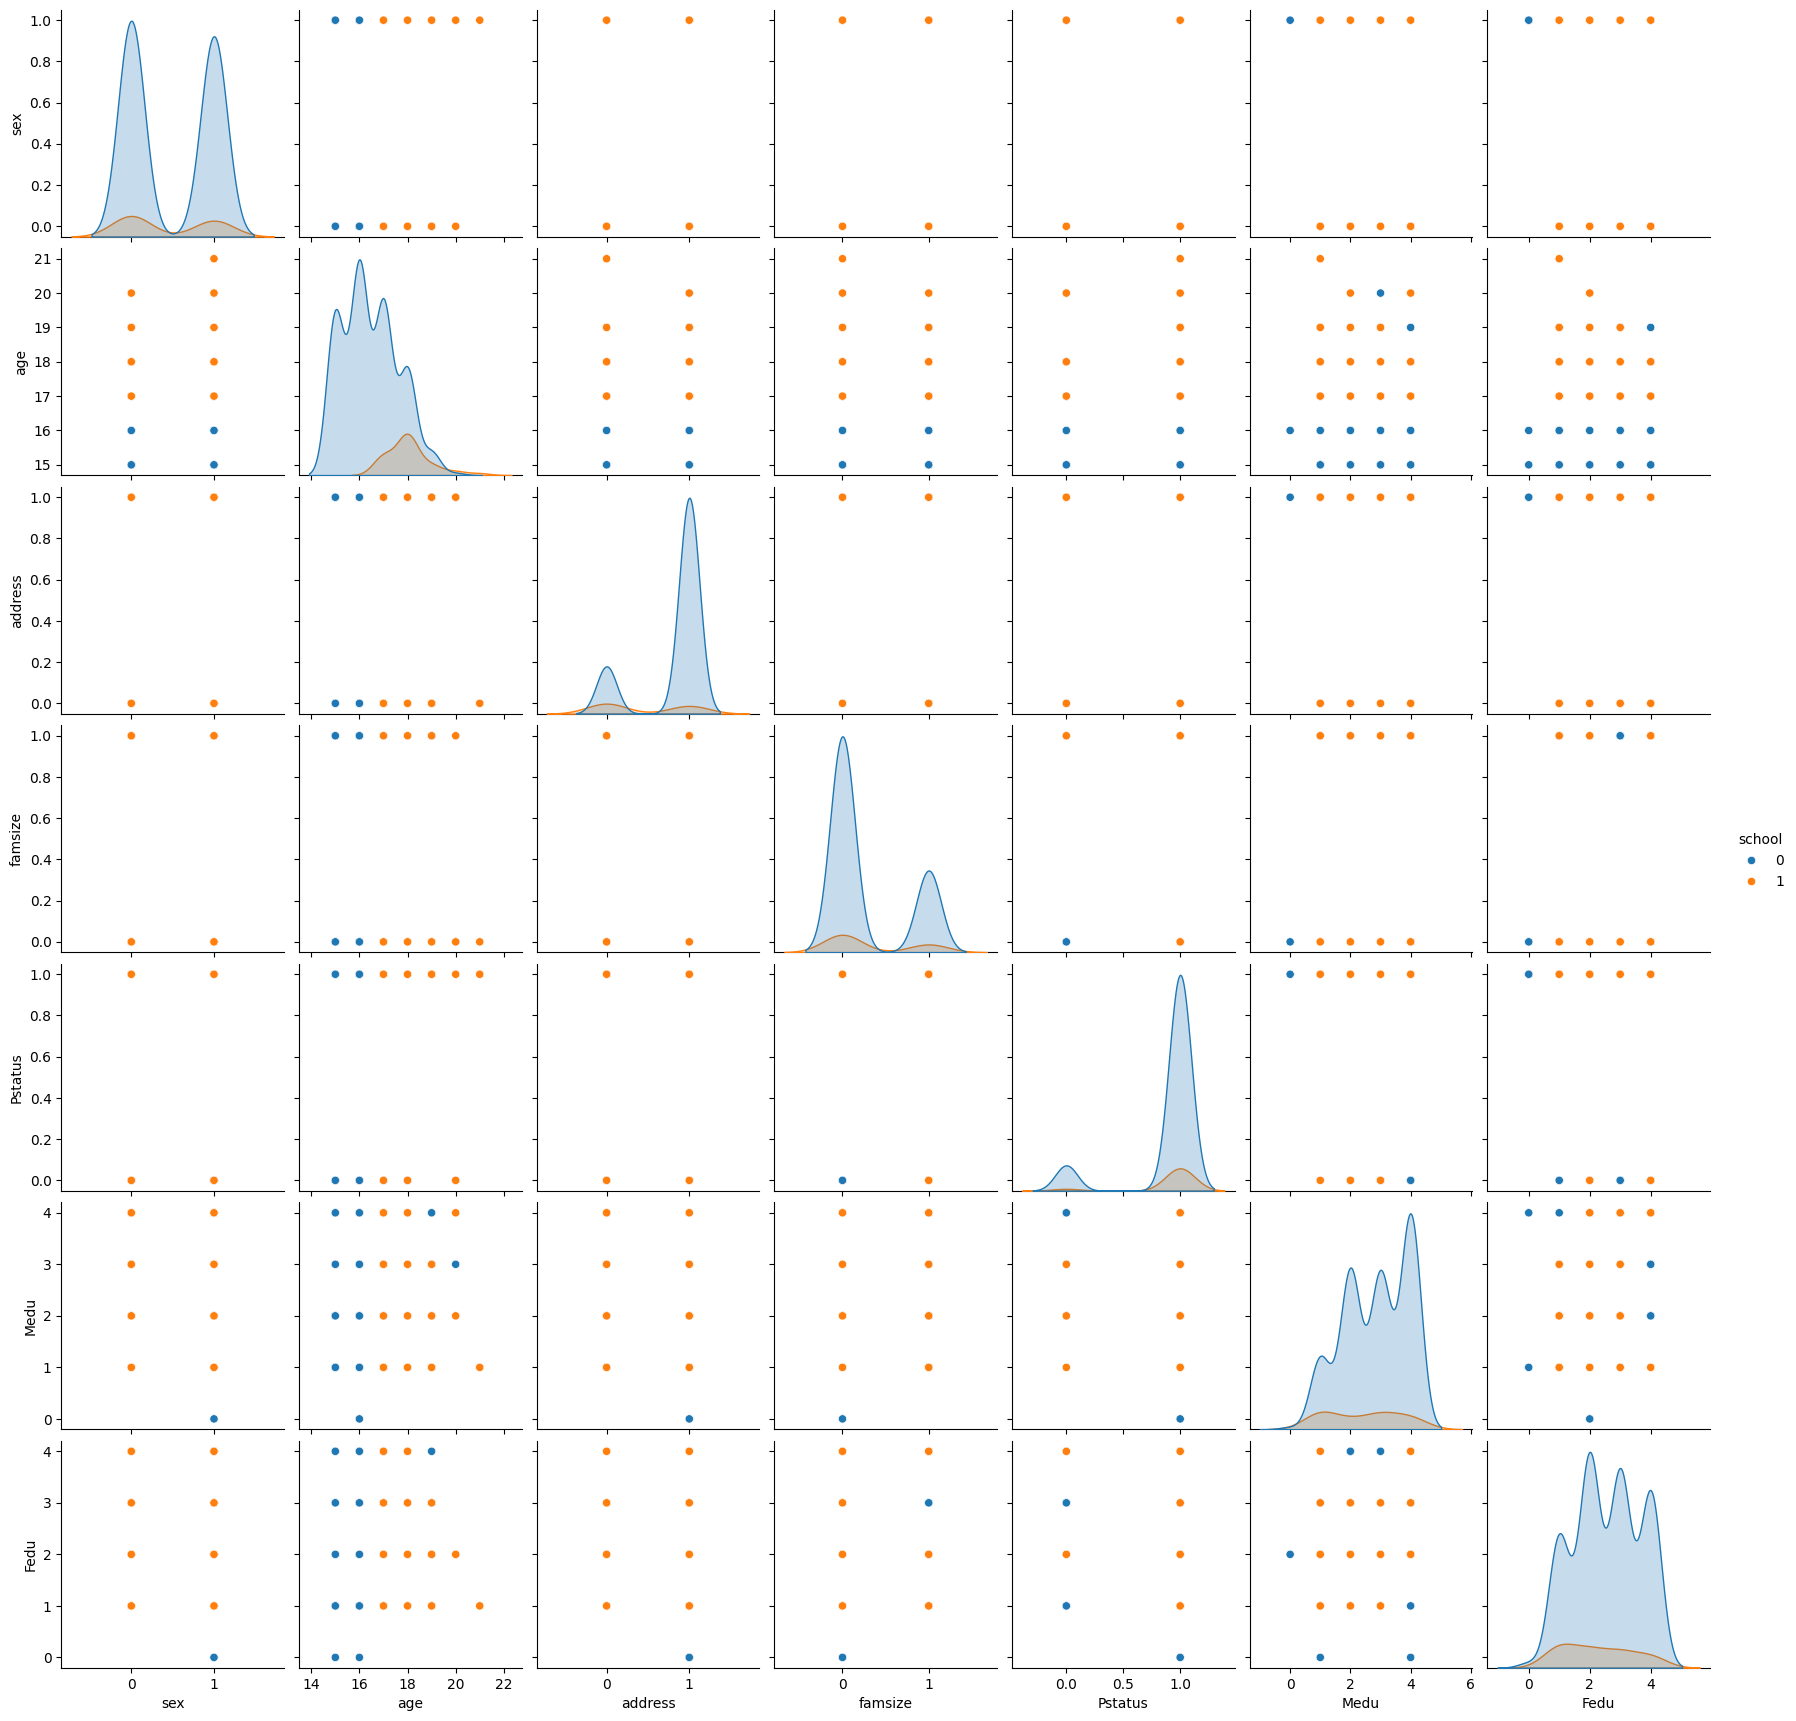

In [ ]:
maths_cl = pd.read_csv("cleaned_dataset_no_outliers.csv", usecols=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',	'Medu',	'Fedu'])

#warnings.filterwarnings("ignore")

sns.pairplot(maths_cl, hue="school")
plt.show()

Scatter plot

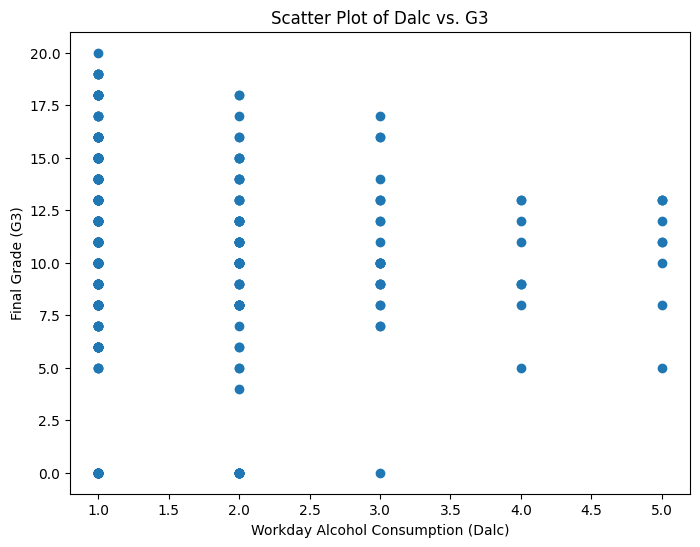

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(maths_encoded['Dalc'], maths_encoded['G3'])
plt.xlabel('Workday Alcohol Consumption (Dalc)')
plt.ylabel('Final Grade (G3)')
plt.title('Scatter Plot of Dalc vs. G3')
plt.show()

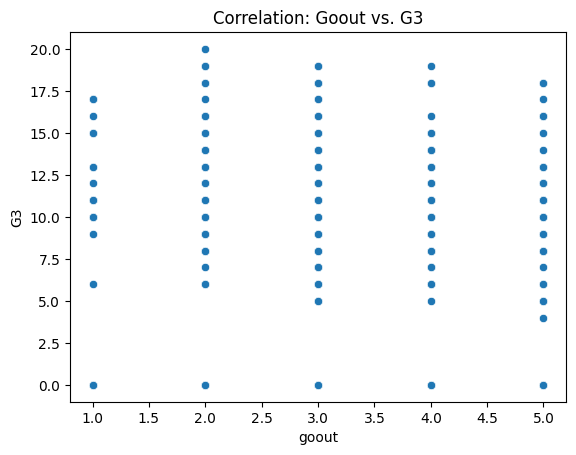

In [ ]:
# correlation between gouout and G3

sns.scatterplot(
    maths_encoded,
    x='goout',
    y='G3',
)

plt.title("Correlation: Goout vs. G3")
plt.show()

Correlation coeficient

In [ ]:
# correlation coeficient between features
correlation_matrix = maths_encoded[['age', 'studytime', 'goout', 'absences', 'G3']].corr()

# display correlation matrix
print(correlation_matrix)

## Pandas profiling report

In [ ]:
profile = ProfileReport(maths)
profile.to_notebook_iframe()
profile.to_file("Exploratory Data Analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation

In [ ]:
# Correlation between final grade (G3) and going out with friends (goout)
korelace_goout = maths_encoded['G3'].corr(maths_encoded['goout'])
print(f"Korelační koeficient mezi G3 a goout: {korelace_goout}")

# Correlation between final grade (G3) and study time (studytime)
korelace_studytime = maths_encoded['G3'].corr(maths_encoded['studytime'])
print(f"Korelační koeficient mezi G3 a studytime: {korelace_studytime}")

# Correlation between final grade (G3) and absences (absences)
korelace_absences = maths_encoded['G3'].corr(maths_encoded['absences'])
print(f"Korelační koeficient mezi G3 a absences: {korelace_absences}")

# Add more correlation calculations as needed, replacing 'feature_name' with
# the actual column names from your dataset
# korelace_feature_name = maths_encoded['G3'].corr(maths_encoded['feature_name'])
# print(f"Korelační koeficient mezi G3 a feature_name: {korelace_feature_name}")
#Všechny korelační koeficienty jsou blízko nule, což znamená, že žádná z těchto proměnných nemá výrazný lineární vztah k naději na dožití.
#To neznamená, že mezi proměnnými neexistuje žádný vztah. Mohlo by jít o nelineární vztahy, které korelační koeficient nedokáže odhalit.

In [ ]:
# Select the columns for variance calculation
vybrane_sloupce = ['G3', 'goout', 'studytime', 'absences', 'age', 'failures']  # Replace with your desired columns

# Calculate variance for the selected columns
rozptyl_vybranych = maths_encoded[vybrane_sloupce].var()

# Print the results
print("Rozptyl pro vybrané sloupce:")
print(rozptyl_vybranych)

Rozptyl pro vybrané sloupce:
G3           20.989616
goout         1.239388
studytime     0.704324
absences     64.049541
age           1.628285
failures      0.553017
dtype: float64


In [ ]:
# Assuming 'G3' is the target variable like 'Life expectancy' in your original code
# Replace 'feature1', 'feature2', etc. with actual column names from your dataset

kovariance_goout = maths_encoded['goout'].cov(maths_encoded["G3"])
print(f"Kovariance mezi goout a G3: {kovariance_goout}")

kovariance_studytime = maths_encoded['studytime'].cov(maths_encoded["G3"])
print(f"Kovariance mezi studytime a G3: {kovariance_studytime}")

kovariance_absences = maths_encoded['absences'].cov(maths_encoded["G3"])
print(f"Kovariance mezi absences a G3: {kovariance_absences}")

# Add more covariance calculations as needed, replacing 'feature_name' with
# the actual column names from your dataset
# kovariance_feature_name = maths_encoded['feature_name'].cov(maths_encoded["G3"])
# print(f"Kovariance mezi feature_name a G3: {kovariance_feature_name}")

In [ ]:
std_G3 = maths_encoded['G3'].std()
print(f"Směrodatná odchylka pro G3 (final grade): {std_G3}")

std_goout = maths_encoded['goout'].std()
print(f"Směrodatná odchylka pro goout (going out with friends): {std_goout}")

std_studytime = maths_encoded['studytime'].std()
print(f"Směrodatná odchylka pro studytime: {std_studytime}")

std_absences = maths_encoded['absences'].std()
print(f"Směrodatná odchylka pro absences: {std_absences}")

# Add more standard deviation calculations as needed, replacing 'feature_name' with
# the actual column names from your dataset
# std_feature_name = maths_encoded['feature_name'].std()
# print(f"Směrodatná odchylka pro feature_name: {std_feature_name}")

In [ ]:
# Select the columns for coefficient of variation calculation
vybrane_sloupce = ['G3', 'goout', 'studytime', 'absences', 'age', 'failures']  # Replace with your desired columns

# Calculate coefficient of variation for the selected columns
variační_koeficient_vybranych = maths_encoded[vybrane_sloupce].std() / maths_encoded[vybrane_sloupce].mean()

print("Variační koeficient pro vybrané sloupce:")
print(variační_koeficient_vybranych)

# Classification model

## Train / test split

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

NameError: name 'x' is not defined

## Lazy predict

In [ ]:
# initialisation lazy predict
lp = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# train lazy predict -> trying all models in a loop
models, predictions = lp.fit(X_train, X_test, y_train, y_test)

In [ ]:
# results lazy predict
models

## Model

In [ ]:
# configuration prep -> každý model importuji jinak a má vlastní parametry
# do slovníku pod každý model uložím importovaný model a parametry
modely = {
    "knn": {"model": KNeighborsClassifier(), "parametry":{'n_neighbors':(3, 5, 7, 9), 'weights':["uniform", "distance"]}},
    "dt": {"model": DecisionTreeClassifier(), "parametry":{'splitter':("best", "random"), 'max_features':(None, "sqrt"), 'criterion':["gini", "entropy"]}},
    "lr": {"model": LogisticRegression(), "parametry":{'penalty':(None, "l1", "l2"), 'C':(0.1, 1, 10), 'solver':["liblinear", "lbfgs"]}},
    "rf": {"model": RandomForestClassifier(), "parametry":{'n_estimators':(50, 100, 200)}},
    "ab": {"model": AdaBoostClassifier(), "parametry":{'n_estimators':(50, 100, 200)}},
    "lsvm": {"model": LinearSVC(), "parametry":{'C':(0.1, 1, 10)}},
    "svm": {"model": SVC(), "parametry":{'C':(0.1, 1, 10), "kernel" : ("poly", "rbf"), "gamma": ("scale", "auto")}}
}

In [ ]:
# list pro ukládání výsledků
results = []
nejlepsi_modely = {}
# pro všechny modely, které jsem si nachystal ve slovníku modely
for model, nastaveni in modely.items():
  print(f"Zpracovávám {model} ...")
  # grid search pro daný model
  gs = GridSearchCV(nastaveni["model"], nastaveni["parametry"], cv=2)
  gs.fit(X_train, y_train)
  # po tréninku pomocí grid search vybereme nejlepší kombinaci parametrů pro daný model
  # a uložíme si nejlepší model
  best_model = gs.best_estimator_
  # uložit si pro budoucí využití nejlepší modely
  nejlepsi_modely[model] = best_model
  # predikce na testovacích datech
  y_pred = best_model.predict(X_test)

  # zapsání výsledků pro daný model
  results.append({"metric": "f1", "model": model, "value": f1_score(y_test, y_pred)})
  results.append({"metric": "auc", "model": model, "value": roc_auc_score(y_test, y_pred)})
  results.append({"metric": "recall", "model": model, "value": recall_score(y_test, y_pred)})

In [ ]:
# zpracování posbíraných výsledků list -> do pandas dataframu
results_df = pd.DataFrame.from_records(results)

# vykreslení výsledků jako bar chart pro různé metriky a modely
ax = sns.barplot(x='metric', y='value', hue='model', data=results_df)
# přidání hodnot nad sloupce
for p in ax.patches:
  ax.annotate(
      format(p.get_height(), '.2f'),
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha = 'center',
      va = 'center',
      xytext = (0, 9),
      textcoords = 'offset points')

plt.show()

Analýza významu featur

podle decision tree nebo logistické regrese najít nejlepší prediktory
vzít všechny feratury, nebo jenom nějaké, ...


In [ ]:
# thety od featur -> čím větší tím lepší prediktor
abs(pd.DataFrame(nejlepsi_modely["lr"].coef_, columns=X.columns)).T.sort_values(0, ascending=False)

In [ ]:
# nejlépe se jeví random forest -> predikce pro test data
y_pred_rf = nejlepsi_modely["rf"].predict(X_test)

In [ ]:
# confusion matice pro predikce nejlepšího rf modelu
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# predikce jako surový výstup - desetinná čísla pro kreslení ROC grafu
# .predict_proba -> predikce
# přetypujeme na dataframe
# vzít sloupec s predikcemi '[1]'
y_pred_rf_proba = pd.DataFrame(nejlepsi_modely["rf"].predict_proba(X_test))[1]

In [ ]:
# napočítání false a true positive rate -> pro ROC křivku
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)

In [ ]:
# vygenerování výstupu náhodného modelu pro porovnání
help_prob = [0 for _ in range(len(y_test))]
help_fpr, help_tpr, _ = roc_curve(y_test, help_prob)

In [ ]:
# Vykreslení grafů náhodného a random forest modelu
plt.plot(help_fpr, help_tpr, linestyle='--', label='Random model')
plt.plot(fpr, tpr, marker='.', label='Random Forest')

# nastavení limitů -> ROC křivka je v rozmezí 0 - 1 v obou osách
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Anotace
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Previous project

In [ ]:
# Příprava dat: prediktor (X) a cílová proměnná (y)
X = data[['infant deaths']]
y = data['Life expectancy ']

# Rozdělení na trénovací a testovací sady (80 % trénovací, 20 % testovací)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vytvoření lineárního regresního modelu
model = LinearRegression()

# Trénování modelu na trénovacích datech
model.fit(X_train, y_train)

# Predikce na testovacích datech
y_pred = model.predict(X_test)

# Vyhodnocení modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Vizualizace trénovacích dat s regresní přímkou
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Trénovací data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regresní přímka')
plt.xlabel('Infant Deaths')
plt.ylabel('Life Expectancy')
plt.title('Lineární regrese na trénovacích datech')
plt.legend()
plt.show()

# Vizualizace testovacích dat s regresní přímkou
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Testovací data')
plt.plot(X_test, y_pred, color='red', label='Regresní přímka')
plt.xlabel('Infant Deaths')
plt.ylabel('Life Expectancy')
plt.title('Lineární regrese na testovacích datech')
plt.legend()
plt.show()

In [ ]:
# Výběr relevantních sloupců
selected_features = [
    'infant deaths',
    'Adult Mortality',
    'GDP',
    'Income composition of resources',
    'Schooling',
    'percentage expenditure',
]

# Odstranění prázdných hodnot
data = life_expectancy[['Life expectancy '] + selected_features].dropna()

In [ ]:
# Prediktory (X) a cílová proměnná (y)
X = data[selected_features]
y = data['Life expectancy ']

# Rozdělení dat na trénovací a testovací sady
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplikace polynomiálních funkcí (např. druhého stupně)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Trénování polynomiální regrese
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predikce
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Vyhodnocení modelu
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Training R-squared (R²): {r2_train:.2f}")
print(f"Test R-squared (R²): {r2_test:.2f}")

# Vizualizace výsledků na testovací sadě (predikce vs skutečné hodnoty)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predikce vs Skutečnost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ideální predikce')
plt.xlabel('Skutečné hodnoty (Life Expectancy)')
plt.ylabel('Predikované hodnoty (Life Expectancy)')
plt.title('Polynomiální regrese - Testovací sada')
plt.legend()
plt.show()

In [ ]:
# připrava dat k predikci

# odstranění mezer v názvech
#dataset = Life_Expectancy_df.copy()
Life_Expectancy_df.columns = Life_Expectancy_df.columns.str.strip()
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'GDP', 'Schooling']
Life_Expectancy_df = Life_Expectancy_df.dropna(subset=features + ['Life expectancy'])
X = Life_Expectancy_df[features]
y = Life_Expectancy_df['Life expectancy']

# Trenovaci sada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Trenovani modelu
model = LinearRegression()
model.fit(X_train, y_train)

# predikce
y_pred = model.predict(X_test)

# běh modelu a vyhodnocení
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Evaluation: MSE = {mse}, R2 = {r2}")

# Graf
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.title("Prediction vs. Actual Life Expectancy")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Vaha prvků
plt.figure(figsize=(10, 6))
#features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
feature_importance.plot(x='Feature', y='Coefficient', kind='bar', legend=False, title='Feature Importance')
plt.ylabel("Coefficient Value")
plt.show()